In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

Variable State adalah categorical data yang harus diubah menjadi 

In [ ]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

state = pd.DataFrame(oh_encoder.fit_transform(df[['State']]))

state.index = df['State'].index
state.columns = ['California', 'Florida', 'New York']

dropped_df = df.drop('State', axis=1)

oh_df = pd.concat([dropped_df, state], axis=1)
oh_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [ ]:
print('California:', oh_df[oh_df['California'] == 1]['California'].count())
print('Florida:', oh_df[oh_df['Florida'] == 1]['Florida'].count())
print('New York:', oh_df[oh_df['New York'] == 1]['New York'].count())

California: 17
Florida: 16
New York: 17


Salah satu dummy variabel dari state dapat dihilangkan untuk melakukan Dummy Variable Encoding. Untuk menghindari Dummy Variable Trap, maka salah satu diantara California dan New York yang memiliki jumlah data yang terbanyak dan sama, dapat dihilangkan. Disini saya menghilangkan California.

In [ ]:
df = oh_df.drop('California', axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


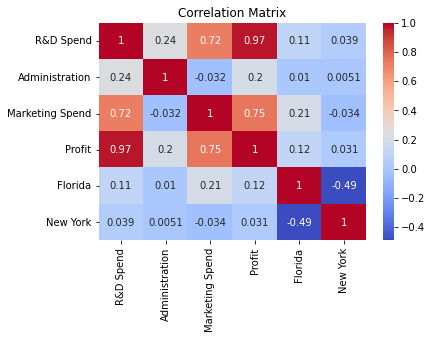

In [ ]:
sns.heatmap(data=df.corr(), cmap='coolwarm',annot=True)
plt.title("Correlation Matrix")
plt.show()

Berdasarkan Heatmap, dapat disimpulkan bahwa **Profit** (Dependent Variable) memiliki korelasi yang tinggi dengan **R&D Spend** (0.97) dan **Marketing Spend** (0.75), serta memiliki korelasi yang rendah dengan **Administration** (0.2), dumy variables dari State (0.12, 0.031).
Untuk menghilangkan multicollinearity yang disebabkan oleh R&D Spend dan Marketing Spend, maka variabel Administration dan Marketing Spend tersebut akan di-drop karena memiliki korelasi yang lebih rendah dari R&D Spend.

In [ ]:
df = df.drop(['Administration', 'Marketing Spend'], axis=1)
df.head()

,R&D Spend,Profit,Florida,New York
0,165349.20,192261.83,0.0,1.0
1,162597.70,191792.06,0.0,0.0
2,153441.51,191050.39,1.0,0.0
3,144372.41,182901.99,0.0,1.0
4,142107.34,166187.94,1.0,0.0


In [ ]:
class LinearRegression:
    def init(self, learn_rate=0.001, n_iters=1500):
        self.learn_rate = learn_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def gradientDescent(self, X, y):
        n_samples, n_features = X.shape
        loss = []
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_iters = self.n_iters

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            db = ( 2 * np.sum(y_pred - y)) / n_samples
            dw =  ( 2 * np.dot(X.T, (y_pred - y))) / n_samples
            loss.append(mean_squared_error(y, y_pred))
            self.bias -= self.learn_rate * db
            self.weights -= self.learn_rate * dw
        
        plt.plot(np.arange(1, n_iters), loss[1:])
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        
        return self.weights, self.bias
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
sc = StandardScaler()
X = df.drop('Profit',axis=1)
X_new = sc.fit_transform(X)
y = df['Profit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

In [ ]:
LR = LinearRegression()
LR.init(0.001, 1500)

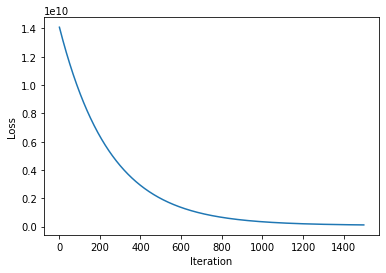

In [ ]:
weights, bias = LR.gradientDescent(X_new,y)

weights = {'Features':['R&D Spend','Florida','New York'], 'Weights':weights}  

weight_list = pd.DataFrame(weights)

In [ ]:
weight_list

,Features,Weights
0,R&D Spend,36680.322162
1,Florida,1557.145828
2,New York,817.019670


In [ ]:
print('Bias (Intercept) = ', bias)

Bias (Intercept) =  106452.58582009695


In [ ]:
Y_pred = LR.predict(X_new)
y_compare = {'y_original': df['Profit'], 'y_pred':LR.predict(X_new)} 

In [ ]:
print(Y_pred)

[180485.33749317 176539.57168132 172486.71529851 163552.68097415
 163337.66973252 153466.19115088 153952.05192484 153805.16753886
 144316.97607097 144846.26469642 130892.49587056 126552.54863796
 124395.00316084 119546.32044276 145446.60573498 139458.45693392
 108262.11792068 123422.07700629 122688.08679525 116772.72404194
 106842.03524926 110290.64902671 108356.41148018 103140.20183106
 109204.58142342  97487.16749793 109433.47870161 105219.86617542
 101944.71702946  99971.29551206  98669.83727885  96363.79716512
  96473.43390526  93422.55007802  82764.77067297  84156.89002457
  71764.97560595  80862.88908491  63343.46257792  76414.00436779
  68499.98070685  71142.74651603  64372.39751398  59530.31963165
  63191.29717918  47821.34751835  49689.17800875  45289.22284903
  47451.5004367   45289.22284903]


In [ ]:
profit_compare = pd.DataFrame(y_compare)
profit_compare

,y_original,y_pred
0,192261.83,180485.337493
1,191792.06,176539.571681
2,191050.39,172486.715299
3,182901.99,163552.680974
4,166187.94,163337.669733
5,156991.12,153466.191151
6,156122.51,153952.051925
7,155752.60,153805.167539
8,152211.77,144316.976071
9,149759.96,144846.264696


In [ ]:
print('MSE: ',mean_squared_error(y, Y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y, Y_pred)))

MSE:  120379092.57350491
RMSE:  10971.740635537504


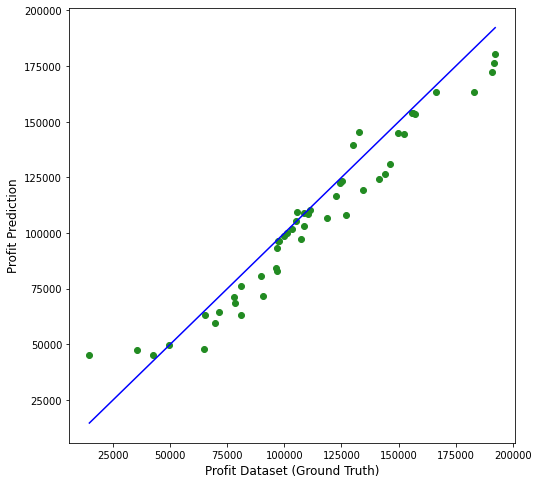

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y, Y_pred, c='forestgreen')

p1 = max(max(y), max(Y_pred))
p2 = min(min(y), min(Y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Profit Dataset (Ground Truth)', fontsize=12)
plt.ylabel('Profit Prediction', fontsize=12)
plt.show()